This code will capture, process and show you the FFT of the signal on AIN0.CH0.

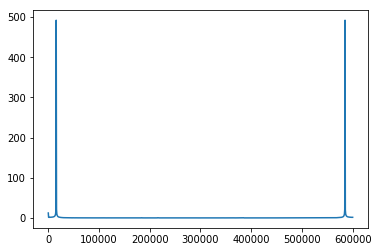

In [1]:
import box0
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

##### PART 1 - Capture

# Allocate resources
dev = box0.usb.open_supported()
ain0 = dev.ain()

# Prepare AIN0 for snapshot mode
ain0.snapshot_prepare()

# Read data from AIN0
bitsize, sampling_freq = ain0.bitsize_speed_get()
data = np.empty(1000, dtype=np.float32)
ain0.snapshot_start(data)

# Free the resources
ain0.close()
dev.close()

##### PART 2 - Process

# perform FFT on captured data
fft_amp = np.abs(scipy.fftpack.fft(data))
fft_freq =  np.linspace(0, sampling_freq, len(fft_amp))

##### PART 3 - Visualize
fig, ax = plt.subplots()

# Show the time domain results (unable to show both plot at once - fix later!...never ;)
#time_x = np.linspace(0, len(data) / sampling_freq, len(data))
#ax.plot(time_x, data)

# Show the frequency domain results
ax.plot(fft_freq, fft_amp)

plt.show()